In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["MedHouseVal"] = housing.target

print(df.head())
print(df.info())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

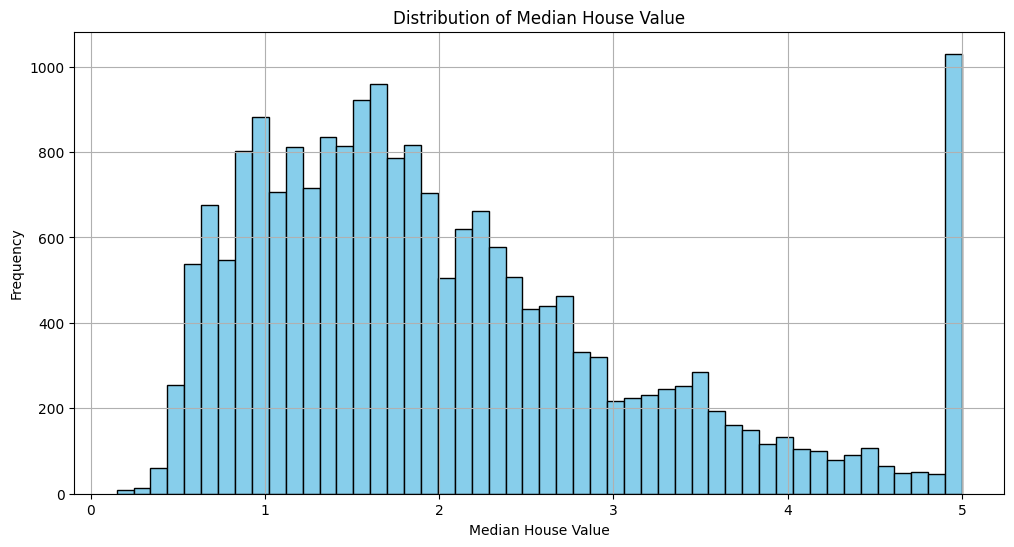

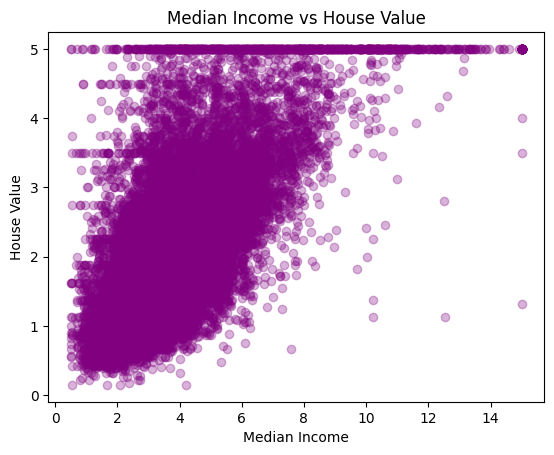

In [ ]:
plt.figure(figsize=(12,6))
df["MedHouseVal"].hist(bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

# Median Income vs House Value
plt.scatter(df["MedInc"], df["MedHouseVal"], alpha=0.3, color="purple")
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.title("Median Income vs House Value")
plt.show()

In [ ]:
X = df[["AveRooms", "MedInc"]].values
y = df["MedHouseVal"].values.reshape(-1,1)

# Standardization for faster convergence
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# Add bias term
X = np.c_[np.ones((X.shape[0],1)), X]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def predict(X, theta):
    return X.dot(theta)


In [ ]:
def batch_gradient_descent(X, y, lr=0.1, epochs=50):
    m, n = X.shape
    theta = np.random.randn(n,1)
    losses = []
    for epoch in range(epochs):
        gradients = -2/m * X.T.dot(y - predict(X, theta))
        theta -= lr * gradients
        loss = mse_loss(y, predict(X, theta))
        losses.append(loss)
    return theta, losses

In [ ]:
def stochastic_gradient_descent(X, y, lr=0.1, epochs=50):
    m, n = X.shape
    theta = np.random.randn(n,1)
    losses = []
    for epoch in range(epochs):
        for i in range(m):
            rand_idx = np.random.randint(m)
            xi = X[rand_idx:rand_idx+1]
            yi = y[rand_idx:rand_idx+1]
            gradients = -2 * xi.T.dot(yi - predict(xi, theta))
            theta -= lr * gradients
        loss = mse_loss(y, predict(X, theta))
        losses.append(loss)
    return theta, losses


In [ ]:
def mini_batch_gradient_descent(X, y, lr=0.1, epochs=50, batch_size=64):
    m, n = X.shape
    theta = np.random.randn(n,1)
    losses = []
    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = -2/xi.shape[0] * xi.T.dot(yi - predict(xi, theta))
            theta -= lr * gradients
        loss = mse_loss(y, predict(X, theta))
        losses.append(loss)
    return theta, losses

In [ ]:
theta_bgd, losses_bgd = batch_gradient_descent(X_train, y_train)
theta_sgd, losses_sgd = stochastic_gradient_descent(X_train, y_train)
theta_mbgd, losses_mbgd = mini_batch_gradient_descent(X_train, y_train)


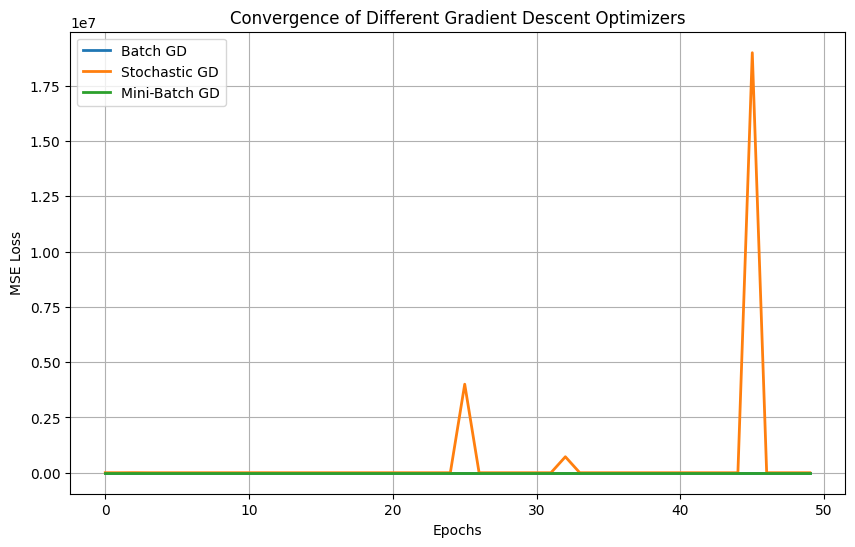

In [ ]:

plt.figure(figsize=(10,6))
plt.plot(losses_bgd, label="Batch GD", linewidth=2)
plt.plot(losses_sgd, label="Stochastic GD", linewidth=2)
plt.plot(losses_mbgd, label="Mini-Batch GD", linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Convergence of Different Gradient Descent Optimizers")
plt.legend()
plt.grid(True)
plt.show()